In [1]:
# Linear Regression

In [2]:
import pandas as pd
data = pd.read_csv('SalaryData.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
data.shape

(30, 2)

In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\Users\Lavanya\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Lavanya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lavanya\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='YearsExperience'>

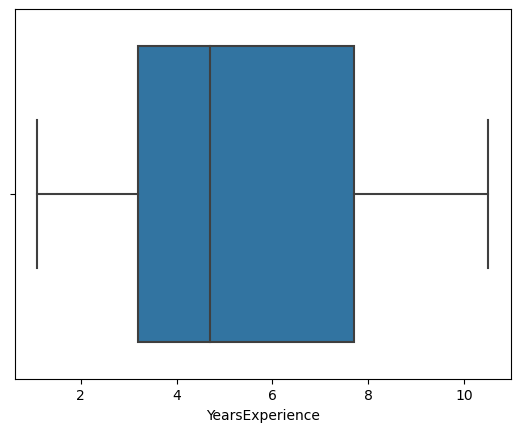

In [8]:
# any outliers and relationships

import seaborn as sns
sns.boxplot(data.YearsExperience)

C:\Users\Lavanya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lavanya\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='Salary'>

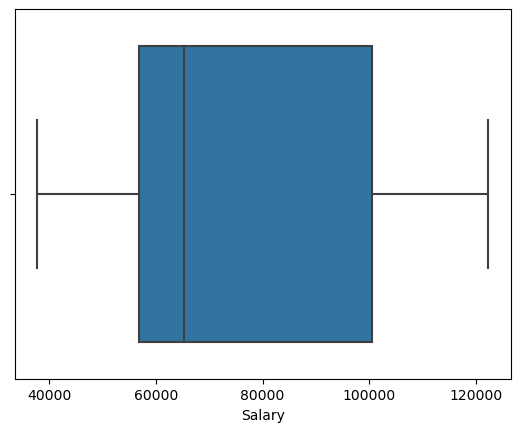

In [9]:
sns.boxplot(data.Salary)

C:\Users\Lavanya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lavanya\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lavanya\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

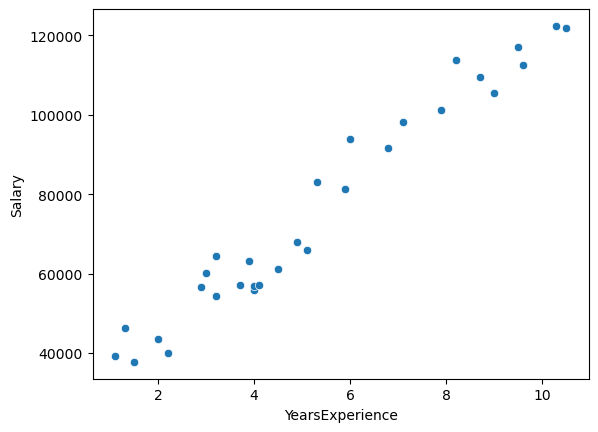

In [10]:
sns.scatterplot(data.YearsExperience,data.Salary)

In [11]:
type(data.YearsExperience),type(data.Salary)

(pandas.core.series.Series, pandas.core.series.Series)

In [15]:
import numpy as np
X = data.YearsExperience
Y = data.Salary
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)
type(X),type(Y),X.shape,Y.shape

(numpy.ndarray, numpy.ndarray, (30, 1), (30, 1))

In [16]:
# Build the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [17]:
Y_predict = model.predict(X_test)

In [18]:
Y_predict

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])

In [19]:
# Model performance - meansquared error and r2score

mse = mean_squared_error(Y_test,Y_predict)
r2 = r2_score(Y_test,Y_predict)
mse,r2

(49830096.85590839, 0.9024461774180497)

In [20]:
# Dump the model
import joblib
dumped_model = joblib.dump(model,'dumped_model.joblib') 

In [23]:
# load the dumped model

testmodel = joblib.load('dumped_model.joblib','r')
testmodel.predict([[2.0]])

array([[44169.21365784]])